# Laporan Proyek Machine Learning - Zefanya Danovanta Tarigan


## Project Overview

Buku adalah kumpulan lembaran atau kertas yang mengandung tulisan, gambar, atau tempelan, yang dijilid pada salah satu sisinya. Bahan-bahan pembentuk buku bisa berupa kertas, kayu, bahkan gading gajah. Setiap sisi lembaran dalam buku disebut halaman. Seiring kemajuan teknologi, hadir pula buku elektronik (e-book) yang dapat diakses menggunakan perangkat seperti komputer, tablet, atau ponsel dengan perangkat lunak khusus .

Sistem rekomendasi digunakan untuk memprediksi atau mengidentifikasi barang, termasuk buku, yang sesuai dengan minat pengguna. Dengan kemajuan teknologi, tersedia berbagai platform yang memudahkan pengguna mencari referensi buku, baik melalui aplikasi digital maupun secara langsung.

Jumlah buku yang sangat banyak sering kali membuat pembaca kesulitan menentukan pilihan bacaan berikutnya. Beberapa pembaca lebih suka buku dengan reputasi penjualan tinggi, sementara yang lain mencari buku serupa dengan yang pernah mereka baca. Ada juga pembaca yang memilih buku berdasarkan rating atau ulasan yang tersedia.

## Alasan Pembuatan Proyek dan Referensi Terkait Proyek :
- Pengembangan proyek sistem rekomendasi ini memiliki peran yang sangat penting. Tujuannya adalah memberikan solusi atas kesulitan pengguna dalam memilih buku yang belum pernah mereka baca. Oleh karena itu, dibutuhkan sebuah sistem yang dapat merekomendasikan buku-buku menarik yang sesuai dengan minat pengguna. Ketika pengguna merasa puas dengan fitur-fitur yang tersedia di dalam platform, mereka cenderung akan terus menggunakan dan berlangganan layanan yang disediakan .

## Data Understanding


Dataset yang digunakan dalam proyek machine learning ini adalah Book Recommendation Dataset, yang terdiri dari 271.360 data buku, 278.858 data pengguna, dan 1.149.780 data penilaian. Dataset ini bersifat open-source dan dipublikasikan oleh MÖBIUS melalui platform Kaggle. Dataset ini mencakup tiga kategori utama: buku (format CSV), penilaian/rating (format CSV), dan pengguna (format CSV).

**Tautan Dataset :** [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

Dataset yang pertama adalah **Users.csv** memiliki jumlah 278858 data dan 3 kolom, yakni :
1. `User-ID` : ID pengguna dari toko buku online. **Tipe data =** `Int64`
2. `Location`: lokasi pengguna. **Tipe data =** `Object`
3. `Age` : usia pengguna. **Tipe data =** `Float64`

Dataset yang kedua yakni 'Books' yang memiliki jumlah 278858 data dan memiliki 8 kolom, diantaranya :
1. `ISBN`: identifikasi dari masing-masing buku. **Tipe data =** `Object`
2. `Book-Title`: judul buku. **Tipe data =** `Object`
3. `Book-Author`: penulis buku. **Tipe data =** `Object`
4. `Year-Of-Publication`: tahun dipublikasikannya buku. **Tipe data =** `Object`
5. `Publisher`: penerbit buku. **Tipe data =** `Object`
6. `Image-URL-S`: URL gambar cover buku dalam ukuran S(Small) **Tipe data =** `Object`
7. `Image-URL-M`: URL gambar cover buku dalam ukuran M(Medium) **Tipe data =** `Object`
8. `Image-URL-L`: URL gambar cover buku dalam ukuran L(Large) **Tipe data =** `Object`

Dataset yang ketiga yakni 'Ratings' yang memiliki jumlah 1149780 data dan memiliki 3 kolom, berikut penjelasan mengenai kolom-kolomnya :
Ratings.csv

1. `User-ID`: ID dari user yang memberikan rating terhadap buku. **Tipe data =** `Int64`
2. `Kolom 'ISBN`: identifikasi buku atau nomor buku yang diberi rating oleh user **Tipe data =** `Object`
3. `Book-Rating`: nilai Rating dari buku, skala yang ada dalam rating ini yakni dari 0-10. **Tipe data =** `Int64`


## Data Loading

### Menyiapkan Kredensial Kaggle



In [1]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zefanyadanovanta","key":"c302f807e6abe887c2f9300e849cf090"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


### Data Loading

In [3]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
 86% 21.0M/24.3M [00:00<00:00, 110MB/s] 
100% 24.3M/24.3M [00:00<00:00, 93.8MB/s]


In [4]:
# unzip
!mkdir book-recommendation-dataset.zip
!unzip book-recommendation-dataset.zip -d book-recommendation-dataset
!ls book-recommendation-dataset

mkdir: cannot create directory ‘book-recommendation-dataset.zip’: File exists
Archive:  book-recommendation-dataset.zip
  inflating: book-recommendation-dataset/Books.csv  
  inflating: book-recommendation-dataset/DeepRec.png  
  inflating: book-recommendation-dataset/Ratings.csv  
  inflating: book-recommendation-dataset/Users.csv  
  inflating: book-recommendation-dataset/classicRec.png  
  inflating: book-recommendation-dataset/recsys_taxonomy2.png  
Books.csv  classicRec.png  DeepRec.png	Ratings.csv  recsys_taxonomy2.png  Users.csv


### Import Library

In [5]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import keras
%matplotlib inline
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from zipfile import ZipFile
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [6]:
# memuat file ke dalam variable
Books = pd.read_csv("/content/book-recommendation-dataset/Books.csv")
Ratings = pd.read_csv("/content/book-recommendation-dataset/Ratings.csv")
Users = pd.read_csv("/content/book-recommendation-dataset/Users.csv")

<ipython-input-6-d7e8f4e01e22>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books = pd.read_csv("/content/book-recommendation-dataset/Books.csv")


## Exploratory Data Analysis

Pada data loading, telah dideklarasikan variabel yang akan dipakai. Variable tersebut diantaranya :

- `Books` : Buku diidentifikasi dengan ISBN masing-masing.
- `Ratings` : Berisi informasi penilaian buku
- `Users` : Berisi pengguna.

In [7]:
# menampilkan jumlah shape pada masing-masing file

print("Books Shape:", Books.shape)
print("Users Shape:", Users.shape)
print("Ratings Shape:", Ratings.shape)

Books Shape: (271360, 8)
Users Shape: (278858, 3)
Ratings Shape: (1149780, 3)


Dari perintah diatas, dapat memberikan informasi dimana dataset `Books` memiliki 271360 baris dan 8 kolom, sedangkan Dataset `Users` memiliki 278858 baris dan 3 kolom, lalu Dataset `Ratings` memiliki 1149780 baris dan 3 kolom

### Variabel `Books`

In [8]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
#Cek informasi dari data Books
Books.info()
print('Jumlah Duplikasi : ',Books.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
Jumlah Duplikasi :  0


Dataset yang Pertama yakni `Books` memiliki memiliki 8 kolom, diantaranya :
1. `ISBN`: identifikasi dari masing-masing buku. **Tipe data =** `Object`
2. `Book-Title`: judul buku. **Tipe data =** `Object`
3. `Book-Author`: penulis buku. **Tipe data =** `Object`
4. `Year-Of-Publication`: tahun dipublikasikannya buku. **Tipe data =** `Object`
5. `Publisher`: penerbit buku. **Tipe data =** `Object`
6. `Image-URL-S`: URL gambar cover buku dalam ukuran S(Small) **Tipe data =** `Object`
7. `Image-URL-M`: URL gambar cover buku dalam ukuran M(Medium) **Tipe data =** `Object`
8. `Image-URL-L`: URL gambar cover buku dalam ukuran L(Large) **Tipe data =** `Object`

lalu pada masing masing kolom tidak memiliki duplikasi data


In [10]:
print('Banyak Buku :', len(Books))

Banyak Buku : 271360


In [11]:
data_books = Books.iloc[:12000]
print('Jumlah Buku yang di gunakan :', len(data_books))

Jumlah Buku yang di gunakan : 12000


### Variabel `Users`

In [12]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
Users.info()
print('Jumlah Duplikasi : ',Users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
Jumlah Duplikasi :  0


Dataset yang Keuda adalah **Users** memiliki 3 kolom, yakni :
1. `User-ID` : ID pengguna dari toko buku online. **Tipe data =** `Int64`
2. `Location`: lokasi pengguna. **Tipe data =** `Object`
3. `Age` : usia pengguna. **Tipe data =** `Float64`

lalu tidak memiliki duplikasi data di masing masing kolom

In [14]:
print('Banyak Pengguna :', len(Users))

Banyak Pengguna : 278858


In [15]:
data_users = Users.iloc[:12000]
print('Jumlah pengguna yang di gunakan :', len(data_users))

Jumlah pengguna yang di gunakan : 12000


### Variabel `Ratings`

In [16]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
Ratings.info()
print('Jumlah Duplikasi : ',Ratings.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
Jumlah Duplikasi :  0


In [18]:
print('Banyak Rating :', len(Ratings))

Banyak Rating : 1149780


In [19]:
data_rating = Ratings.iloc[:12000]
print('Jumlah pengguna yang di gunakan :', len(data_rating))

Jumlah pengguna yang di gunakan : 12000


## Data Preparation

Data preparation bertujuan untuk menyiapkan data sebelum masuk ke proses modeling. Selain itu, data preparation juga berguna untuk meningkatkan akurasi saat training data. Pada dataset ini, yang akan kita lakukan yaitu menggabungkan dataset dengan fungsi merge() dan key ISBN, menghapus missing value serta menurut dataset berdasarkan ISBN serta menghapus hasil duplikat.

### Variabel `Books`

In [20]:
data_books.rename(columns = {'Book-Title':'Book_Title', 'Book-Author': 'Book_Author', 'Year-Of-Publication': 'Year_Publication'},inplace = True)
data_books.head()

<ipython-input-20-ac32a475b2a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_books.rename(columns = {'Book-Title':'Book_Title', 'Book-Author': 'Book_Author', 'Year-Of-Publication': 'Year_Publication'},inplace = True)


,ISBN,Book_Title,Book_Author,Year_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [21]:
data_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L' ], axis=1, inplace=True)
data_books.head()

<ipython-input-21-2623b122739d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L' ], axis=1, inplace=True)


,ISBN,Book_Title,Book_Author,Year_Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [22]:
data_books['Year_Publication'] = pd.to_numeric(data_books['Year_Publication'], errors='coerce')

<ipython-input-22-18a19300f811>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_books['Year_Publication'] = pd.to_numeric(data_books['Year_Publication'], errors='coerce')


In [23]:
data_books.info()
print('Jumlah Duplikasi : ',data_books.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISBN              12000 non-null  object
 1   Book_Title        12000 non-null  object
 2   Book_Author       12000 non-null  object
 3   Year_Publication  12000 non-null  int64 
 4   Publisher         12000 non-null  object
dtypes: int64(1), object(4)
memory usage: 468.9+ KB
Jumlah Duplikasi :  0


### Variabel `Ratings`

In [24]:
data_rating.rename(columns = {'User-ID':'UserID', 'Book-Rating': 'Book_Rating'},inplace = True)
data_rating.head()

<ipython-input-24-26100c1ffd21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rating.rename(columns = {'User-ID':'UserID', 'Book-Rating': 'Book_Rating'},inplace = True)


,UserID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Variabel `Users`

In [25]:
data_users.rename(columns = {'User-ID':'UserID'}, inplace = True)
data_users.head()

<ipython-input-25-ba4dad9fc400>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_users.rename(columns = {'User-ID':'UserID'}, inplace = True)


,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [26]:
data_users.drop(['Age'], axis=1, inplace=True)
data_users.head()

<ipython-input-26-00917c38bde7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_users.drop(['Age'], axis=1, inplace=True)


,UserID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [27]:
print('Jumlah Buku berdasarkan Rating : ', len(data_rating.ISBN.unique()))
print('Jumlah Buku berdasarkan Daftar Buku : ', len(data_books.ISBN.unique()))
print('Jumlah Pengguna berdasarkan ID PEngguna : ', len(data_users.UserID.unique()))

Jumlah Buku berdasarkan Rating :  10945
Jumlah Buku berdasarkan Daftar Buku :  12000
Jumlah Pengguna berdasarkan ID PEngguna :  12000


**Menggabungkan `data_books` dan `data_rating` dengan menggunakan fungsi merge**

In [28]:
data_train = data_rating.merge(data_books, left_on = 'ISBN', right_on = 'ISBN')
data_train.head()

,UserID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
2,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
3,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group
4,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books


In [29]:
data_train.info()
print('Jumlah Duplikasi : ',data_train.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UserID            3341 non-null   int64 
 1   ISBN              3341 non-null   object
 2   Book_Rating       3341 non-null   int64 
 3   Book_Title        3341 non-null   object
 4   Book_Author       3341 non-null   object
 5   Year_Publication  3341 non-null   int64 
 6   Publisher         3341 non-null   object
dtypes: int64(3), object(4)
memory usage: 182.8+ KB
Jumlah Duplikasi :  0


<ipython-input-30-9e0b4dccbed4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year.index,y=year, palette = 'viridis')


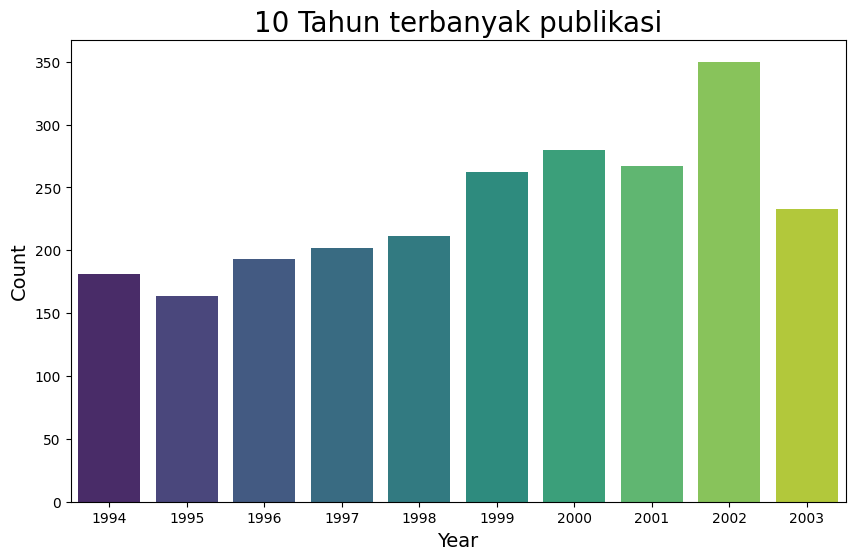

In [30]:
year=data_train['Year_Publication'].value_counts()[0:10]
plt.figure(figsize=(10,6))
plt.title("10 Tahun terbanyak publikasi", fontsize=20)
sns.barplot(x=year.index,y=year, palette = 'viridis')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**Menggabungkan `data_user` dan `data_rating` dengan menggunakan fungsi merge**

In [31]:
data_using = data_rating.merge(data_users, left_on = 'UserID', right_on = 'UserID')
data_using.head()

,UserID,ISBN,Book_Rating,Location
0,2,0195153448,0,"stockton, california, usa"
1,7,034542252,0,"washington, dc, usa"
2,8,0002005018,5,"timmins, ontario, canada"
3,8,0060973129,0,"timmins, ontario, canada"
4,8,0374157065,0,"timmins, ontario, canada"


In [32]:
data_using.info()
print('Jumlah Duplikasi : ',data_using.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UserID       2439 non-null   int64 
 1   ISBN         2439 non-null   object
 2   Book_Rating  2439 non-null   int64 
 3   Location     2439 non-null   object
dtypes: int64(2), object(2)
memory usage: 76.3+ KB
Jumlah Duplikasi :  0


<ipython-input-33-b4b7c4e3a75f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counter.index, y=rating_counter, palette='viridis')


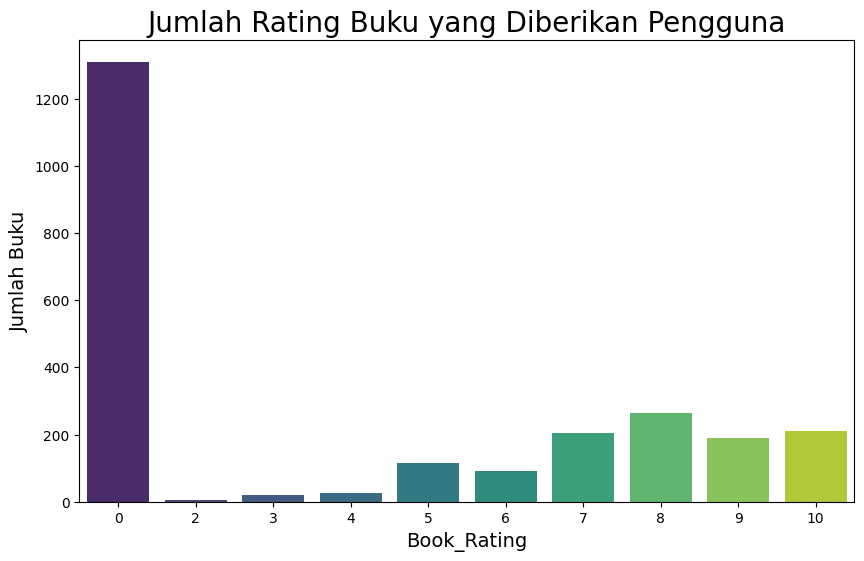

In [33]:
rating_counter=data_using['Book_Rating'].value_counts()[0:10]
plt.figure(figsize=(10,6))
plt.title("Jumlah Rating Buku yang Diberikan Pengguna", fontsize=20)
sns.barplot(x=rating_counter.index, y=rating_counter, palette='viridis')
plt.xlabel('Book_Rating', fontsize=14)
plt.ylabel('Jumlah Buku', fontsize=14)
plt.show()

<ipython-input-34-71bdf988c517>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'count', y = 'Book_Author', data = most_author.head(10), palette='viridis');


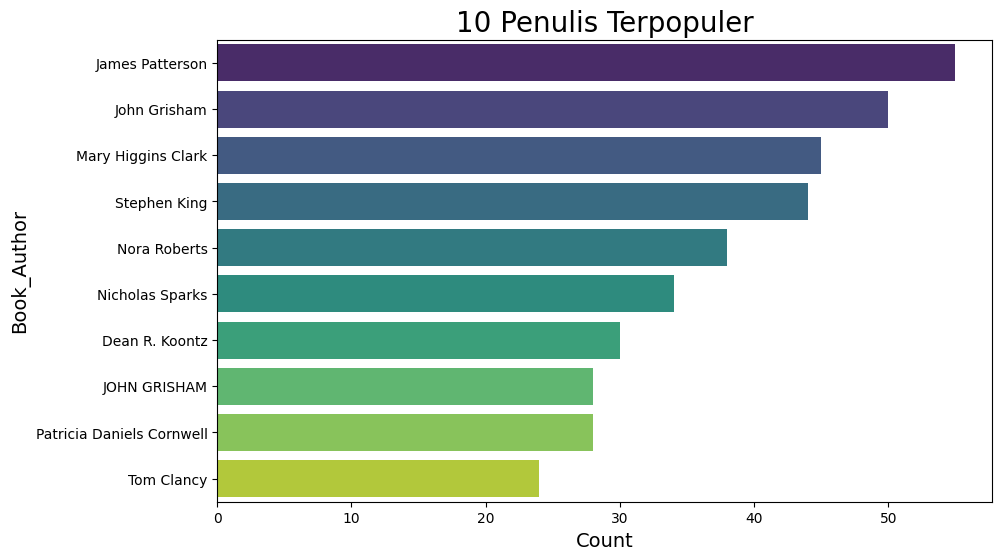

In [34]:
most_author = data_train.Book_Author.value_counts().reset_index()
most_author.columns = ['Book_Author','count']

plt.figure(figsize = (10,6))
plt.title("10 Penulis Terpopuler",fontsize = 20)
sns.barplot(x = 'count', y = 'Book_Author', data = most_author.head(10), palette='viridis');
plt.ylabel('Book_Author', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.show()

<ipython-input-35-1bc6f8fa4997>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'count', y = 'Location', data = most_loc.head(10), palette='viridis');


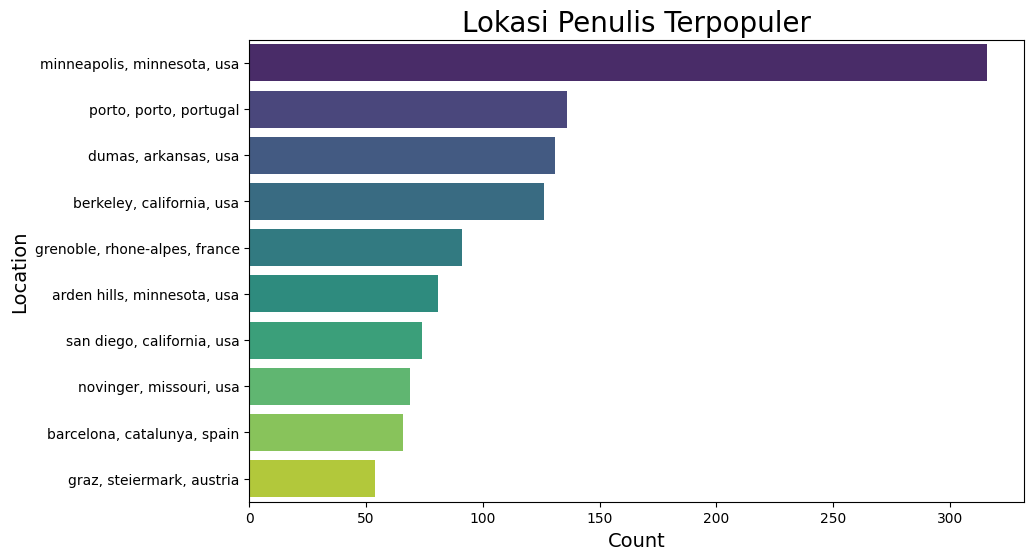

In [35]:
most_loc = data_using.Location.value_counts().reset_index()
most_loc.columns = ['Location','count']

plt.figure(figsize = (10,6))
plt.title("Lokasi Penulis Terpopuler", fontsize=20)
sns.barplot(x = 'count', y = 'Location', data = most_loc.head(10), palette='viridis');
plt.ylabel('Location', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.show()

<ipython-input-36-72da6fb8145a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'count', y = 'Publisher', data = most_publis.head(10),  palette='viridis');


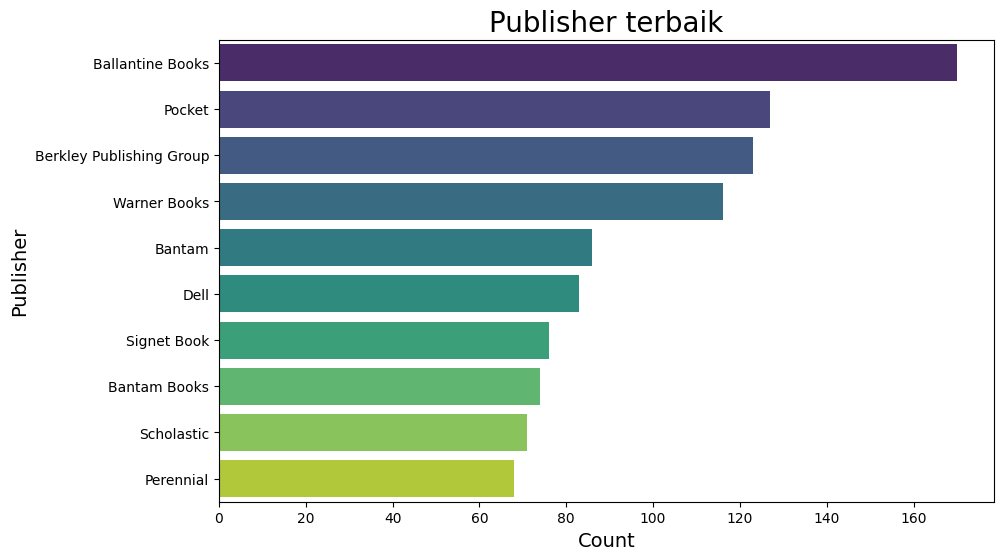

In [36]:
most_publis = data_train.Publisher.value_counts().reset_index()
most_publis.columns = ['Publisher','count']

plt.figure(figsize = (10,6))
plt.title("Publisher terbaik", fontsize= 20)
sns.barplot(x = 'count', y = 'Publisher', data = most_publis.head(10),  palette='viridis');
plt.ylabel('Publisher', fontsize=14)
plt.xlabel('Count', fontsize = 14)
plt.show()

<ipython-input-37-93ef29c5e24c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Book_Rating', y = 'Book_Title', data = most_rated_by_reads.head(10), palette='viridis')


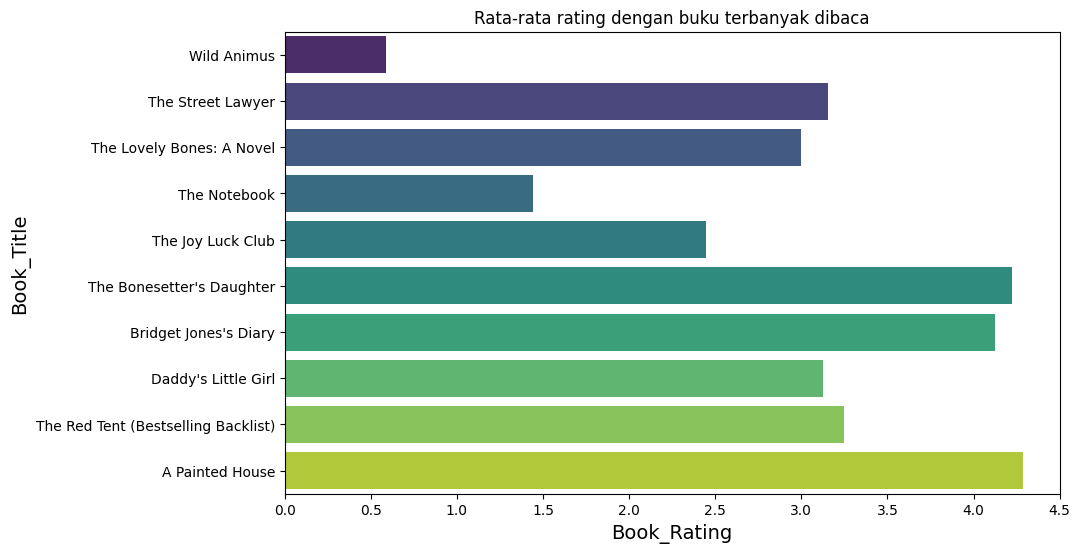

In [37]:
data_aver = data_train.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
temp = data_train.Book_Title.value_counts().reset_index()
temp.columns = ['Book_Title','count']
most_rated_by_reads = pd.merge(data_aver,temp,on='Book_Title')

most_rated_by_reads = most_rated_by_reads.sort_values('count',ascending=False)

plt.figure(figsize=(10,6))
plt.title("Rata-rata rating dengan buku terbanyak dibaca")
sns.barplot(x = 'Book_Rating', y = 'Book_Title', data = most_rated_by_reads.head(10), palette='viridis')
plt.xlabel('Book_Rating', fontsize=14)
plt.ylabel('Book_Title', fontsize=14)
plt.show()

## Data Cleaning

proses mendeteksi dan mengoreksi (atau menghapus) catatan yang rusak atau tidak akurat dari kumpulan catatan, tabel, atau basis data dan mengacu pada pengidentifikasian bagian data yang tidak lengkap, salah, tidak akurat atau tidak relevan dan kemudian mengganti, memodifikasi, atau menghapus data kotor atau kasar.

In [38]:
# check missing values pada data_books
(data_books.isnull() | data_books.empty | data_books.isna()).sum()

,0
ISBN,0
Book_Title,0
Book_Author,0
Year_Publication,0
Publisher,0


In [39]:
# check missing values pada data_rating
(data_rating.isnull() | data_rating.empty | data_rating.isna()).sum()

,0
UserID,0
ISBN,0
Book_Rating,0


In [40]:
# check missing values pada data_users
(data_users.isnull() | data_users.empty | data_users.isna()).sum()

,0
UserID,0
Location,0


In [41]:
# check missing values pada data_train
(data_train.isnull() | data_train.empty | data_train.isna()).sum()

,0
UserID,0
ISBN,0
Book_Rating,0
Book_Title,0
Book_Author,0
Year_Publication,0
Publisher,0


In [42]:
# check missing values pada data_using
(data_using.isnull() | data_using.empty | data_using.isna()).sum()

,0
UserID,0
ISBN,0
Book_Rating,0
Location,0


Dari output diatas, dapat diambil kesimpulan bahwa masing masing kolom di semua dataset tidak mempuyai nilai yang kosong (Missing Value)



In [43]:
data_prep = data_train
data_prep.sort_values('ISBN').head()

,UserID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Publication,Publisher
1749,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1901,190,0002740230,7,Keep It Simple: And Get More Out of Life,Nick Page,1999,Trafalgar Square
3258,901,0006276199,0,Alien at St Wilfred's,Adrian Plass,1999,Zondervan
3259,901,000649840X,9,Angelas Ashes,Frank Mccourt,0,Harpercollins Uk
2736,643,0007100221,7,TERROR FIRMA,Matthew Thomas,2001,Trafalgar Square


In [44]:
data_prep = data_prep.drop_duplicates('ISBN')
data_prep.head()

,UserID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
2,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
3,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group
4,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books


In [45]:
data_prus = data_using
data_prus.sort_values('UserID').head()

,UserID,ISBN,Book_Rating,Location
0,2,0195153448,0,"stockton, california, usa"
1,7,034542252,0,"washington, dc, usa"
19,8,1881320189,7,"timmins, ontario, canada"
18,8,1575663937,6,"timmins, ontario, canada"
16,8,1558746218,0,"timmins, ontario, canada"


In [46]:
data_prus = data_prus.drop_duplicates('UserID')
data_prus.head()

,UserID,ISBN,Book_Rating,Location
0,2,0195153448,0,"stockton, california, usa"
1,7,034542252,0,"washington, dc, usa"
2,8,0002005018,5,"timmins, ontario, canada"
20,9,0440234743,0,"germantown, tennessee, usa"
23,10,1841721522,0,"albacete, wisconsin, spain"


In [47]:
# Mengonversi data series 'ISBN’ menjadi dalam bentuk list
books_id = data_prep['ISBN'].tolist()

# Mengonversi data series ‘Title’ menjadi dalam bentuk list
books_title = data_prep['Book_Title'].tolist()

# Mengonversi data series ‘Author’ menjadi dalam bentuk list
books_author = data_prep['Book_Author'].tolist()

print('Jumlah ID Buku : ', len(books_id))
print('Jumlah Judul Buku : ', len(books_title))
print('Jumlah Penulis Buku : ', len(books_author))

Jumlah ID Buku :  2519
Jumlah Judul Buku :  2519
Jumlah Penulis Buku :  2519


In [48]:
# Membuat dictionary untuk data ‘books_id’, ‘books_title’, dan ‘books_author’
books_new = pd.DataFrame({
    'id': books_id,
    'title':books_title,
    'author': books_author
})
books_new.head()

,id,title,author
0,034545104X,Flesh Tones: A Novel,M. J. Rose
1,0446520802,The Notebook,Nicholas Sparks
2,038550120X,A Painted House,JOHN GRISHAM
3,0425115801,Lightning,Dean R. Koontz
4,0449006522,Manhattan Hunt Club,JOHN SAUL


In [49]:
data = data_rating
data.head()

,UserID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [50]:
# Mengubah UserID menjadi list tanpa nilai yang sama
user_ids = data['UserID'].unique().tolist()
print('list UserID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded UserID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke UserID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke UserID: ', user_encoded_to_user)

list UserID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

In [51]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = data['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

#Selanjutnya, petakan userID dan ISBN ke dataframe yang berkaitan.

# Mapping userID ke dataframe user
data['user'] = data['UserID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe book
data['book'] = data['ISBN'].map(book_to_book_encoded)

<ipython-input-51-2842fc72ec9f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user'] = data['UserID'].map(user_to_user_encoded)
<ipython-input-51-2842fc72ec9f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['book'] = data['ISBN'].map(book_to_book_encoded)


In [52]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah book
num_book = len(book_encoded_to_book)
print(num_book)

# Mengubah rating menjadi nilai float
data['Book_Rating'] = data['Book_Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data['Book_Rating'])

# Nilai maksimal rating
max_rating = max(data['Book_Rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

1164
10945
Number of User: 1164, Number of Resto: 10945, Min Rating: 0.0, Max Rating: 10.0


<ipython-input-52-2d11d5c6675f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Book_Rating'] = data['Book_Rating'].values.astype(np.float32)


In [53]:
# Mengacak dataset
data = data.sample(frac=1, random_state=42)
data.head()

,UserID,ISBN,Book_Rating,user,book
1935,277427,156865037X,7.0,255,1881
6494,278418,0446360406,0.0,678,6118
1720,277427,0553297422,0.0,255,1676
9120,278582,0140277471,9.0,749,8616
360,276875,883041915X,0.0,65,356


In [54]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = data[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = data['Book_Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.9 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 255 1881]
 [ 678 6118]
 [ 255 1676]
 ...
 [ 678 5066]
 [ 139  850]
 [ 678 6857]] [0.7 0.  0.  ... 0.  0.5 0. ]


## Data Modeling

Proses untuk menjalankan algoritma Machine Learning untuk mengolah dataset yang sudah dibagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola atau output tertentu. Pada tahap ini saya menggunakan model collaborative filtering dimana menggunakan metode deep learning yang bertujuan menghasilkan rekomendasi buku.



In [55]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [56]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [57]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.6684 - root_mean_squared_error: 0.4381 - val_loss: 0.5738 - val_root_mean_squared_error: 0.3869
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4673 - root_mean_squared_error: 0.3268 - val_loss: 0.5346 - val_root_mean_squared_error: 0.3647
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4548 - root_mean_squared_error: 0.3212 - val_loss: 0.5042 - val_root_mean_squared_error: 0.3485
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4388 - root_mean_squared_error: 0.3125 - val_loss: 0.4809 - val_root_mean_squared_error: 0.3369
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4337 - root_mean_squared_error: 0.3095 - val_loss: 0.4634 - val_root_mean_squared_error: 0.3288
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4091 - root_mean_squared_error: 0.2983 - val_loss: 0.4504 - val_root_mean_squared_error: 0.3230
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 

## Evaluasi

### Metrik Root Mean Squared Error (RMSE)

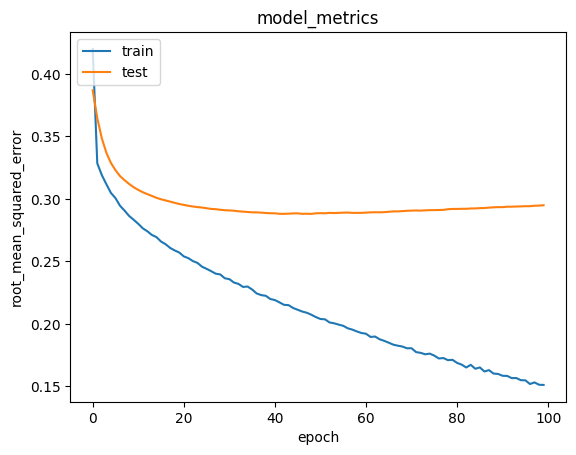

In [58]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Sistem Collaborative Filtering

In [59]:
book_data = books_new

# Mengambil sample user
user_id = data.UserID.sample(1).iloc[0]
book_visited_by_user = data[data.UserID == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_visited = book_data[~book_data['id'].isin(book_visited_by_user.ISBN.values)]['id']
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited))

### Hasil Sistem Rekomendasi Collaborative Filtering

In [60]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_ratings_indices
]

print('Menampilkan Rekomendasi Untuk Pengguna: {}'.format(user_id))
print('===' * 9)

print('10 Rekomendasi Buku Teratas')
print('----' * 8)

recommended_book = book_data[book_data['id'].isin(recommended_book_ids)]
i=1
for row in recommended_book.itertuples():
    print(i,row.title, ':', row.author)
    i+=1

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Menampilkan Rekomendasi Untuk Pengguna: 914
10 Rekomendasi Buku Teratas
--------------------------------
1 Little Altars Everywhere : Rebecca Wells
2 The Watsons Go to Birmingham - 1963 (Yearling Newbery) : CHRISTOPHER PAUL CURTIS
3 Les Fourmis : Bernard Werber
4 To Kill a Mockingbird : Harper Lee
5 She's Come Undone (Oprah's Book Club) : Wally Lamb
6 Rebecca : Daphne Du Maurier
7 Chasing the Dime : Michael Connelly
8 This Year It Will Be Different: And Other Stories : Maeve Binchy
9 The Bonesetter's Daughter : Amy Tan
10 The Phantom Tollbooth : Norton Juster


### Mean Squared Error (MSE)

In [61]:
print("MSE dari pada data train = ", mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3)
print("MSE dari pada data validation = ", mean_squared_error(y_true=y_val, y_pred=model.predict(x_val))/1e3)

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MSE dari pada data train =  2.1176639194068425e-05
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE dari pada data validation =  8.684515903366322e-05
